# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**Answer:** 17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [49]:
import pandas as pd

In [50]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [51]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [52]:
print(df.isna().sum().sum()) # sums all nan values in entire data frame

0


No NAN values found

Note I ran this code for a Correlation Matrix after I created the X data frame a few cells below - so it is out of order to best align with the place it should go in the Problem questions of the assignment

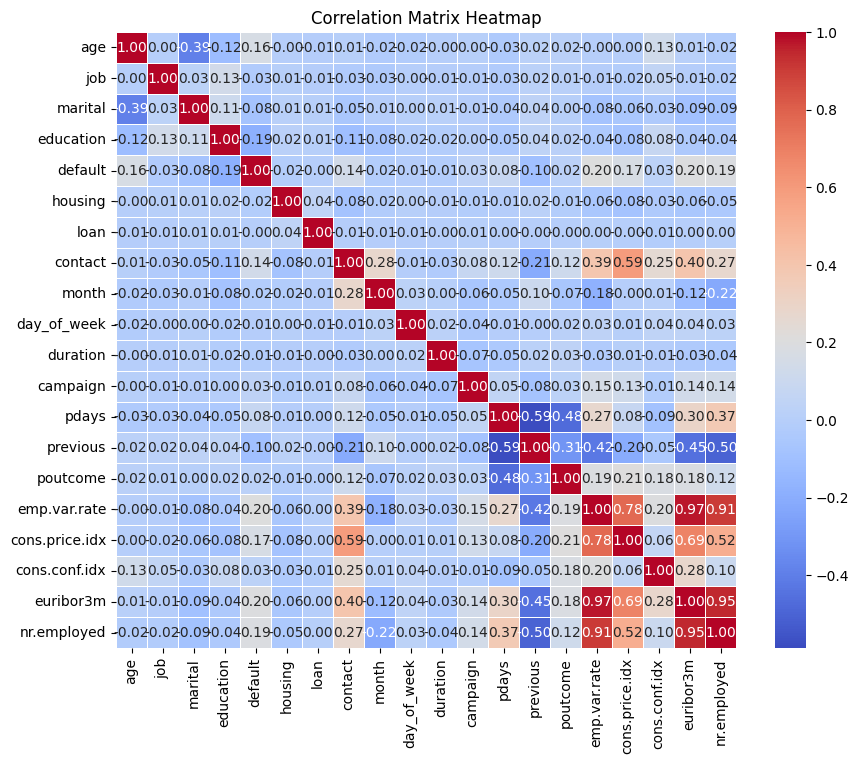

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = X.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Note: some features with strong correlations may be able to be dropped if there is a need to drop features to reduce model processing time

The code cell below is to determine the most impactful features

In [72]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Initialize and fit the model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

           Feature  Importance
10        duration    0.319271
18       euribor3m    0.110355
0              age    0.093191
19     nr.employed    0.055905
1              job    0.048503
3        education    0.043657
11        campaign    0.042424
9      day_of_week    0.040627
12           pdays    0.032588
17   cons.conf.idx    0.029774
14        poutcome    0.029028
2          marital    0.023910
16  cons.price.idx    0.022777
15    emp.var.rate    0.021299
5          housing    0.020578
8            month    0.019422
6             loan    0.014482
13        previous    0.013571
7          contact    0.009835
4          default    0.008804


The output above shows that the call duration is the most impactful feature

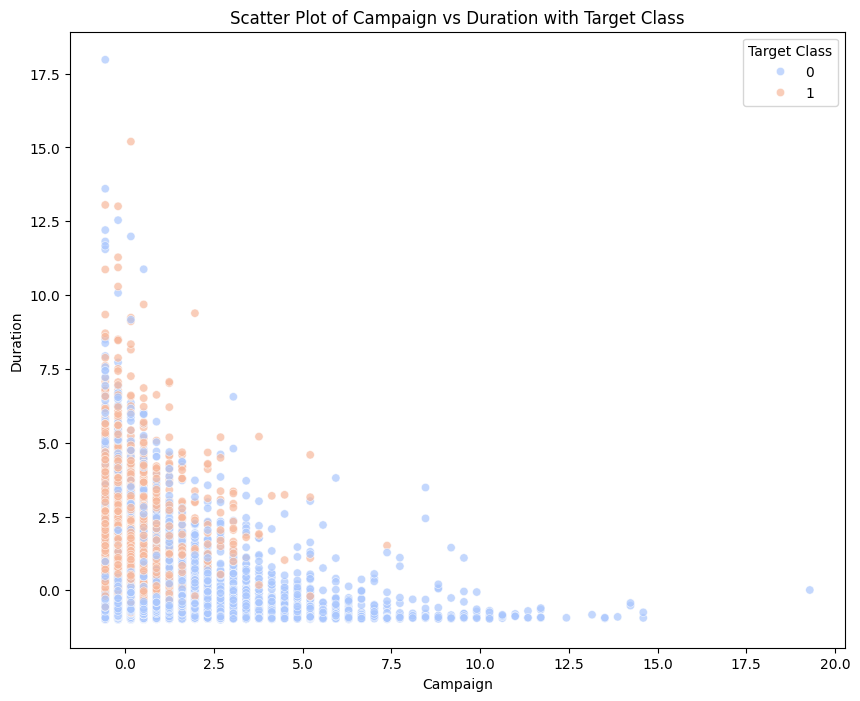

In [74]:
# Note this code needs to be run post the data set split down below - I only included this here to show I explored the data first
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X['campaign'], y=X['duration'], hue=y, palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Campaign vs Duration with Target Class')
plt.xlabel('Campaign')
plt.ylabel('Duration')
plt.legend(title='Target Class', loc='upper right')
plt.show()

This plot shows the duration of the call is more important than the number of touches signified; the red/orange dots show it

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Answer:** The Business Objective is to determine the results of campaign actions on getting a yes that a customer had a bank term subscriber deposit.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [54]:
# Separate features and target variable
X = df.drop('y', axis=1)
y = df['y']

In [55]:
print(type(y))

<class 'pandas.core.series.Series'>


In [56]:
X.shape

(41188, 20)

In [57]:
y.shape

(41188,)

The cell below encodes and standard scales the data into numerical form so it can be processed by the models
- Including mapping the y column's values to 1 for Yes and 0 for No

In [58]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# For the target variable, you can simply map 'yes' and 'no' to 1 and 0
y = y.map({'yes': 1, 'no': 0})

# Encode categorical variables
le = LabelEncoder()
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for feature in categorical_features:
    X[feature] = le.fit_transform(X[feature])

# Feature Scaling
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])


Below X now has numerical data types and is ready for model processing

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  float64
 2   marital         41188 non-null  float64
 3   education       41188 non-null  float64
 4   default         41188 non-null  float64
 5   housing         41188 non-null  float64
 6   loan            41188 non-null  float64
 7   contact         41188 non-null  float64
 8   month           41188 non-null  float64
 9   day_of_week     41188 non-null  float64
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  float64
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train.shape

(32950, 20)

In [62]:
X_test.shape

(8238, 20)

In [63]:
y_train.shape

(32950,)

In [64]:
y_test.shape

(8238,)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [65]:
# to set a baseline for the most frequent class
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42).fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)
#print(baseline_score)
print("Baseline Score: {:.2f}%".format(baseline_score * 100))

Baseline Score: 88.65%


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lgr = LogisticRegression().fit(X_train, y_train)
lgr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred = lgr.predict(X_test)


### Problem 9: Score the Model

What is the accuracy of your model?

In [67]:
# Use accuracy_score function to get the accuracy
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Accuracy Score: 91.04%


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score
from time import time
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Decision': DecisionTreeClassifier()
}

params = {
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'Logistic Regression': {'C': [0.001, 0.1, 1, 10]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
    'Decision': {'max_depth': [3]}
}

scoring = make_scorer(accuracy_score)  # or precision_score, recall_score

results2 = []

# grid
for model_name, model in models.items():
    # Grid search
    grid = GridSearchCV(model, params[model_name], scoring=scoring, cv=3)
    start = time()
    grid.fit(X_train, y_train)
    end = time()
    
    # Store the results
    result = pd.DataFrame({
        'model': [model_name],
        'train score': [grid.score(X_train, y_train)],
        'test score': [grid.score(X_test, y_test)],
        'average fit time': [(end - start) / 3]  # average over 3-fold CV
    })
    results2.append(result)

results_df2 = pd.concat(results2, ignore_index=True)

print(results_df2)

                 model  train score  test score  average fit time
0                  KNN     0.918816    0.902161          5.378167
1  Logistic Regression     0.911077    0.909444          0.607963
2                  SVC     0.919909    0.909565        389.578789
3             Decision     0.908619    0.908958          0.120571


In [68]:
# obstracted the data from the run output above into required presentation frame below
res_dict = {'Model': ['Logistic Regression','KNN','Descision Tree','SVC'],
           'Train Time': [0.607963, 5.378167, 0.120571, 389.578789],
           'Train Accuracy': [0.911077, 0.918816, 0.908619, 0.919909],
           'Test Accuracy': [0.909444, 0.902161, 0.908958, 0.909565]}
results_df3 = pd.DataFrame(res_dict).set_index('Model')

results_df3

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.607963,0.911077,0.909444
KNN,5.378167,0.918816,0.902161
Descision Tree,0.120571,0.908619,0.908958
SVC,389.578789,0.919909,0.909565


**Summary** 

Based on my analysis of the models the SVC model did slightly best however, its run time was very long. In implementation go with Decision Tree since it like the other models did about as well however, its training time was the lowest. However all modells accuracy was about the same.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [69]:
# Note: See my above code in my answer to problem 10 - it has all base and multi parameter models included in it via GridSearch

##### Questions